In [33]:
import pandas as pd
import datetime as dt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

df = pd.read_csv("src/data/analyzed/daily_demand_clean.csv")
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
df['day_of_year'] = df['date'].dt.dayofyear
df['year'] = df['date'].dt.year

# filter for after Jan 2019
df = df[df['date'] >= "2019-01-01"]

In [46]:
country = 'BE'
type = 'total'

df_country = df[df['country'] == country]
df_country['type'].unique()

df_type = df_country[df_country['type'] == type]
df_pivot = df_type.pivot_table(index='day_of_year', columns='year', values='demand')
df_pivot['2019-21-AVG'] = df_pivot[[2019, 2020, 2021]].mean(axis=1)
df_pivot = df_pivot.drop(columns=[2019, 2020, 2021])

# Plot using Plotly
fig = go.Figure()

# Add traces for each year
for year in df_pivot.columns:
    fig.add_trace(go.Scatter(x=df_pivot.index, y=df_pivot[year], mode='lines', name=str(year)))

# Update layout
fig.update_layout(title=f'Daily Natural Gas Demand for {country}, {type}',
                  xaxis_title='Day of Year',
                  yaxis_title='kWh per day',
                  legend_title='Year')

fig.write_html(f"src/figures/daily_raw/{country}_{type}.html") 

In [23]:
df[df['type'] == 'total']['country'].unique()

array(['AT', 'BE', 'BG', 'DE', 'DK', 'EE', 'FR', 'HR', 'HU', 'IE', 'IT',
       'LU', 'LV', 'NL', 'PL', 'PT', 'RO', 'SI', 'UK'], dtype=object)

In [3]:

df_total = df[df['type'] == 'total']

df_grouped = df.groupby(['country', 'date'], as_index=False)['demand'].sum()

#filter for reference period 2019-01-01 to 2021-12-31
df_ref = df_grouped[(df_grouped['date'] >= "2019-01-01") & (df_grouped['date'] <= "2021-12-31")]
df_ref['day_of_year'] = df_ref['date'].dt.dayofyear
df_grouped['day_of_year'] = df_grouped['date'].dt.dayofyear

#compute average demand by country in the reference period
ref_avg_demand = (
    df_ref.groupby(['country', 'day_of_year'])['demand']
          .mean()
          .reset_index(name='ref_demand')
)

#merge back into the main dataframe
df_grouped = pd.merge(
    df_grouped, 
    ref_avg_demand, 
    on=['country', 'day_of_year'], 
    how='left'
)

#calculate indexed demand
df_grouped['demand_indexed'] = df_grouped['demand'] / df_grouped['ref_demand']

#filter for dates after Jan 2021
df_grouped = df_grouped[df_grouped['date'] > "2021-01-31"]

# Create the chart using Plotly
fig = px.line(
    df_grouped[df_grouped['country'].isin(['AT', 'DK', 'IE'])],
    x='date',
    y='demand_indexed',
    color='country',
    title='Daily Natural Gas Demand'
)

# Update the y-axis title
fig.update_layout(
    yaxis_title='kWh',
    xaxis_title='Date',
    xaxis=dict(type='date')  # Set x-axis type to date
)

fig.show()  # Display the figure

/var/folders/65/v55t85jx0k799mrx8ctk7yvr0000gn/T/ipykernel_11070/1290968728.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref['day_of_year'] = df_ref['date'].dt.dayofyear


In [39]:
for country in df['country'].unique():
    print(country)
    print(df[df['country'] == country]['type'].unique())
    print('---')

AT
['total' 'power']
---
DK
['total' 'power']
---
FR
['total' 'industry' 'household' 'power']
---
IE
['household' 'industry' 'power' 'total']
---
DE
['distribution' 'industry' 'total' 'household' 'power']
---
UK
['industry' 'household' 'power' 'total']
---
BE
['household' 'industry' 'power']
---
BG
['total' 'power']
---
EE
['total' 'power']
---
HR
['total' 'power']
---
HU
['household' 'industry-power' 'power']
---
IT
['household' 'industry' 'power']
---
LU
['household' 'industry-power' 'power']
---
LV
['total' 'power']
---
NL
['household' 'industry' 'power']
---
PL
['total' 'power']
---
PT
['household' 'industry-power' 'power']
---
RO
['household' 'industry-power' 'power']
---
SI
['total' 'power']
---
LT
['power']
---
FI
['power']
---
GR
['power']
---
CZ
['power']
---
SK
['power']
---
ES
['power']
---
SE
['power']
---


<Axes: xlabel='date'>

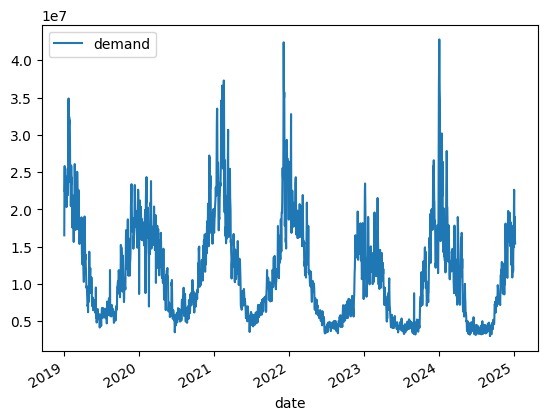

In [36]:
df[(df['country'] == 'EE') & (df['type'] == 'total')].plot(x='date', y='demand', kind='line')

In [41]:
df[df['country'] == 'SE']['type'].unique()

array(['power'], dtype=object)